In [2]:

import os # directory management
import pandas as pd # data analysis
from scipy import stats # descriptive statistics
import matplotlib.pyplot as plt # figures
import numpy as np # maths
import seaborn as sns

# Dataset I: New Orleans Housing Prices

In [3]:
df = pd.read_csv('new_orleans_airbnb_listings.csv')
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6028 non-null   int64  
 1   name                         6028 non-null   object 
 2   description                  6000 non-null   object 
 3   neighborhood_overview        4614 non-null   object 
 4   host_id                      6028 non-null   int64  
 5   host_since                   5990 non-null   object 
 6   host_location                5983 non-null   object 
 7   host_response_time           4449 non-null   object 
 8   host_response_rate           4449 non-null   object 
 9   host_acceptance_rate         4562 non-null   object 
 10  host_is_superhost            5990 non-null   object 
 11  host_listings_count          5990 non-null   float64
 12  host_verifications           6028 non-null   object 
 13  host_has_profile_p

In [4]:
df['price'] = df['price'].str.replace('$', '')  # remove $ sign
df['price'] = df['price'].str.replace(',', '')  # remove , sign

C:\Users\User\AppData\Local\Temp\ipykernel_16852\3275613283.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')  # remove $ sign


In [5]:
# convert data type to float of price
df['price'] = df['price'].astype(float)
df['price'].describe()


count    6028.000000
mean      225.361314
std       235.789359
min         0.000000
25%       105.000000
50%       158.000000
75%       258.000000
max      4657.000000
Name: price, dtype: float64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6028 non-null   int64  
 1   name                         6028 non-null   object 
 2   description                  6000 non-null   object 
 3   neighborhood_overview        4614 non-null   object 
 4   host_id                      6028 non-null   int64  
 5   host_since                   5990 non-null   object 
 6   host_location                5983 non-null   object 
 7   host_response_time           4449 non-null   object 
 8   host_response_rate           4449 non-null   object 
 9   host_acceptance_rate         4562 non-null   object 
 10  host_is_superhost            5990 non-null   object 
 11  host_listings_count          5990 non-null   float64
 12  host_verifications           6028 non-null   object 
 13  host_has_profile_p

In [28]:
# numeric data
df.describe()

,id,host_id,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,6.028000e+03,6.028000e+03,5990.000000,6028.000000,6028.000000,6028.000000,5725.000000,5906.000000,6028.000000,6028.000000,...,6028.000000,6028.000000,5356.000000,5341.000000,5343.000000,5341.000000,5342.000000,5341.000000,5341.000000,5356.000000
mean,3.096340e+07,1.261613e+08,46.634224,29.957344,-90.074508,4.890511,2.126288,2.825601,225.361314,8.938288,...,13.503650,1.157764,4.770147,4.831558,4.790548,4.893647,4.869369,4.770092,4.753503,3.215560
std,1.522782e+07,1.194316e+08,198.528224,0.022954,0.028415,2.914003,1.401288,2.181143,235.789359,17.625508,...,19.153095,1.750629,0.395421,0.299826,0.324464,0.250731,0.268262,0.322707,0.314243,7.813658
min,1.909100e+04,5.146000e+03,0.000000,29.899070,-90.137480,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,1.840335e+07,2.554932e+07,1.000000,29.940738,-90.089010,2.000000,1.000000,1.000000,105.000000,1.000000,...,0.000000,0.000000,4.710000,4.800000,4.730000,4.890000,4.850000,4.690000,4.690000,0.750000
50%,3.228621e+07,9.466656e+07,2.000000,29.956640,-90.073320,4.000000,2.000000,2.000000,158.000000,2.000000,...,6.000000,0.000000,4.860000,4.910000,4.880000,4.960000,4.950000,4.870000,4.830000,1.750000
75%,4.472240e+07,1.949531e+08,12.000000,29.969393,-90.063517,6.000000,3.000000,4.000000,258.000000,3.000000,...,21.000000,2.000000,4.960000,4.980000,4.980000,5.000000,5.000000,4.970000,4.910000,3.322500
max,5.315408e+07,4.282765e+08,3186.000000,30.160150,-89.738090,16.000000,23.000000,30.000000,4657.000000,365.000000,...,359.000000,18.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,292.000000


In [29]:
# describe categorical variables
df.describe(include=['O'])


,name,description,neighborhood_overview,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,first_review,last_review,license,instant_bookable
count,6028,6000,4614,5990,5983,4449,4449,4562,5990,6028,...,6028,6028,6028,6012,6028,6028,5356,5356,5543,6028
unique,5752,5486,3455,1992,269,4,47,77,2,233,...,67,53,4,32,5403,2,1815,668,3731,2
top,Sextant | The Lola | 5 min drive to Bourbon St...,"LOCATION: Being centrally located, you will ha...",Central Business District,2017-06-06,"New Orleans, Louisiana, United States",within an hour,100%,100%,f,"['email', 'phone']",...,Central Business District,Entire residential home,Entire home/apt,1 bath,"[""Air conditioning"", ""Security cameras on prop...",t,2020-02-23,2021-11-01,"Exempt: This listing is a licensed hotel, mote...",t
freq,27,58,239,244,4084,3658,3472,1684,3306,972,...,840,2101,5108,2775,47,5983,31,439,1229,3228


In [22]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\User\AppData\Local\Temp\ipykernel_11912\3784545759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,id,host_id,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
id,1.000000,0.526572,0.202860,-0.029245,0.034387,0.201462,0.163954,0.146599,0.092093,-0.112232,-0.104567,0.112350,0.150494,0.147511,0.143407,-0.554474,-0.035826,0.000590,-0.066243,-0.082507,-0.033356,-0.113528,-0.111794,-0.071285,-0.060876,0.029492
host_id,0.526572,1.000000,0.024461,0.030041,0.068059,0.187760,0.165426,0.175527,0.105137,-0.127910,-0.108490,0.115196,0.129925,0.137711,0.127694,-0.284515,0.010512,-0.026705,-0.092806,-0.093280,-0.065906,-0.086858,-0.100124,-0.109540,-0.083306,0.029480
host_listings_count,0.202860,0.024461,1.000000,-0.069509,0.044064,0.096993,0.030807,0.054176,0.028944,-0.062549,-0.034256,0.070979,0.099425,0.063739,0.117650,-0.125852,-0.050920,-0.086169,-0.059431,-0.065859,-0.085118,-0.128206,-0.109482,0.013467,-0.041708,-0.015376
latitude,-0.029245,0.030041,-0.069509,1.000000,0.446773,0.028493,0.028231,0.036011,-0.045597,0.006968,0.038844,0.029001,0.028827,0.018298,-0.022333,0.016490,-0.015118,-0.017691,-0.022772,-0.012380,-0.023173,0.021625,0.012182,-0.136023,-0.000796,-0.012441
longitude,0.034387,0.068059,0.044064,0.446773,1.000000,0.081634,0.076573,0.088605,0.049549,-0.035333,0.001976,0.033369,0.040759,0.038047,0.059068,-0.004956,0.006913,-0.007629,-0.054898,-0.057425,-0.041312,-0.053752,-0.061368,-0.115214,-0.043859,0.001905
accommodates,0.201462,0.187760,0.096993,0.028493,0.081634,1.000000,0.852302,0.840884,0.580125,-0.045038,0.018601,0.131420,0.140410,0.143952,0.200528,-0.180168,-0.061846,-0.099684,-0.038387,-0.083000,-0.056485,-0.049557,-0.054089,-0.127576,-0.076070,-0.031136
bedrooms,0.163954,0.165426,0.030807,0.028231,0.076573,0.852302,1.000000,0.872947,0.644181,-0.044985,0.006590,0.097592,0.098533,0.108851,0.179407,-0.158778,-0.082230,-0.114815,-0.024910,-0.059249,-0.031295,-0.012644,-0.031525,-0.135101,-0.061633,-0.042638
beds,0.146599,0.175527,0.054176,0.036011,0.088605,0.840884,0.872947,1.000000,0.613299,-0.054757,-0.011907,0.116786,0.115788,0.122946,0.189212,-0.137542,-0.074074,-0.109207,-0.029173,-0.073400,-0.043162,-0.035464,-0.056566,-0.121955,-0.068023,-0.037403
price,0.092093,0.105137,0.028944,-0.045597,0.049549,0.580125,0.644181,0.613299,1.000000,-0.032770,-0.005010,0.153003,0.132705,0.127971,0.180519,-0.162991,-0.099594,-0.126230,-0.005085,-0.034954,0.006154,-0.035311,-0.049332,0.022763,-0.061395,-0.054840
minimum_nights,-0.112232,-0.127910,-0.062549,0.006968,-0.035333,-0.045038,-0.044985,-0.054757,-0.032770,1.000000,0.126916,-0.049077,-0.052272,-0.066413,-0.040493,-0.126896,-0.228096,-0.241409,-0.032546,-0.003965,-0.027863,0.015648,0.017688,-0.016060,-0.014965,-0.111364


# Dataset II: Property prices Ames, Iowa

In [36]:
df1 = pd.read_csv('C:/Users/User/OneDrive - Université Bretagne Sud/Machine Learning/Project/house-prices-advanced-regression-techniques/train.csv')
#df2= pd.read_csv('C:/Users/User/OneDrive - Université Bretagne Sud/Machine Learning/Project/house-prices-advanced-regression-techniques/test.csv')

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [42]:
# count missing values in df1 in the entire dataset
missing_values_count = df1.isnull().sum()
for i in range(len(missing_values_count)):
    #print the index and number of missing values
    print(i, missing_values_count[i])


0 0
1 0
2 0
3 259
4 0
5 0
6 1369
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 8
26 8
27 0
28 0
29 0
30 37
31 37
32 38
33 37
34 0
35 38
36 0
37 0
38 0
39 0
40 0
41 0
42 1
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 690
58 81
59 81
60 81
61 0
62 0
63 81
64 81
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 1453
73 1179
74 1406
75 0
76 0
77 0
78 0
79 0
80 0


In [47]:
# Since there are 1460 rows in the dataset, we will remove any column with more than 700 (~half) missing values. 
df2= df1.dropna(axis= 'columns', thresh=700)
df2.info()

# drop rows with missing values
# df2.dropna(axis=0, inplace=True)
# df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [48]:
# fill missing values with mean for numeric variables
df3 = df2.fillna(df2.mean())
df3.info()

C:\Users\User\AppData\Local\Temp\ipykernel_16416\28064892.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3 = df2.fillna(df2.mean())


Note that test set doesn't have data for the dependent variable - Sale Price. Hence, only train set can be used for the analysis.

In [52]:
# correlation matrix with p values
corr_matrix = df3.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')  


C:\Users\User\AppData\Local\Temp\ipykernel_16416\1834880630.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df3.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000070,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.249367,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150338,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [53]:
sorted = corr_matrix["SalePrice"].sort_values(ascending=False)
sorted

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [56]:
# p-values for correlation - to check statistical significance
# can discard variables with p-value > 0.05
from scipy.stats import pearsonr

pearson = []
for i in df3.columns:
    if df3.dtypes[i] == np.int64 or df3.dtypes[i] == np.float64:
        #print(i)
        pearson.append((i, pearsonr(df3[i], df3['SalePrice'])))

#sort pearson list based on correlation coefficient
pearson.sort(key=lambda x: x[1][1], reverse=True)
pearson


[('BsmtFinSF2',
  PearsonRResult(statistic=-0.011378121450215141, pvalue=0.6639986508340907)),
 ('BsmtHalfBath',
  PearsonRResult(statistic=-0.016844154297359012, pvalue=0.5201536357277567)),
 ('MiscVal',
  PearsonRResult(statistic=-0.02118957964030326, pvalue=0.41848634940803825)),
 ('Id',
  PearsonRResult(statistic=-0.021916719443431112, pvalue=0.40269379975577235)),
 ('LowQualFinSF',
  PearsonRResult(statistic=-0.02560613000067956, pvalue=0.32820730984052837)),
 ('YrSold',
  PearsonRResult(statistic=-0.028922585168730326, pvalue=0.2694131932808431)),
 ('3SsnPorch',
  PearsonRResult(statistic=0.04458366533574841, pvalue=0.08858170358056278)),
 ('MoSold',
  PearsonRResult(statistic=0.04643224522381934, pvalue=0.07612757850604744)),
 ('OverallCond',
  PearsonRResult(statistic=-0.07785589404867801, pvalue=0.002912351267915519)),
 ('MSSubClass',
  PearsonRResult(statistic=-0.0842841351265952, pvalue=0.0012664716847494539)),
 ('PoolArea',
  PearsonRResult(statistic=0.0924035494918732, pva

In [59]:
sorted.index[1], sorted.index[0]

('OverallQual', 'SalePrice')

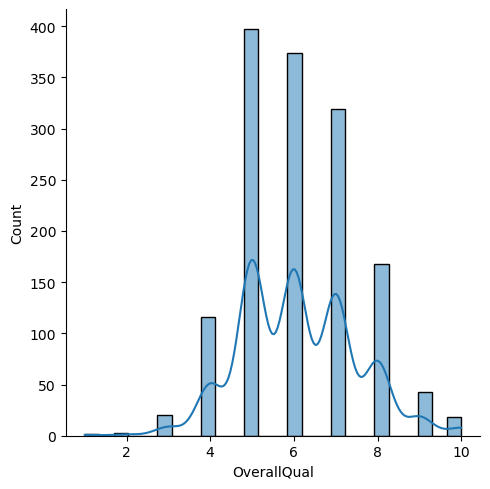

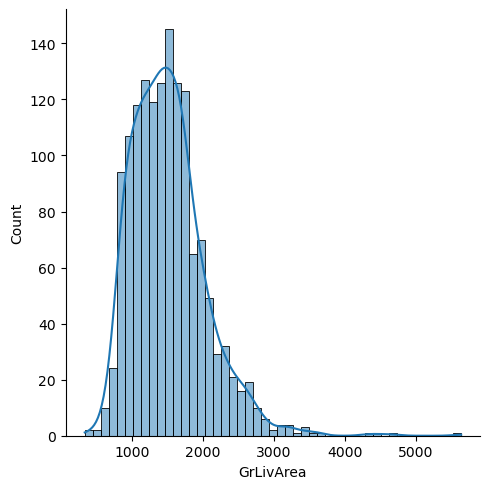

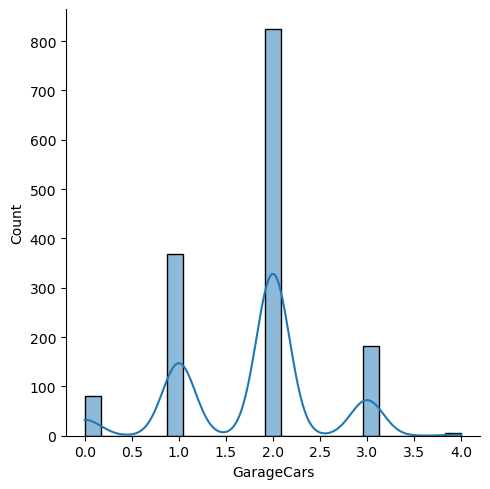

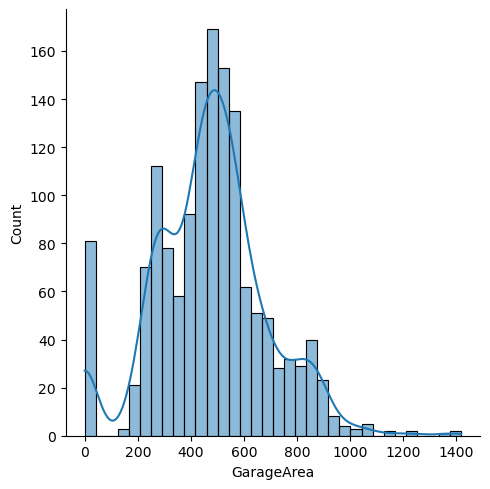

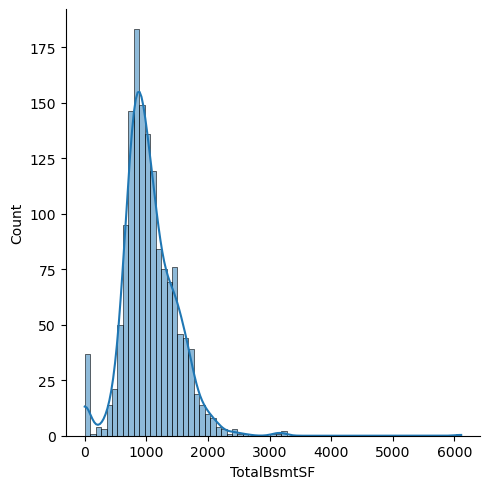

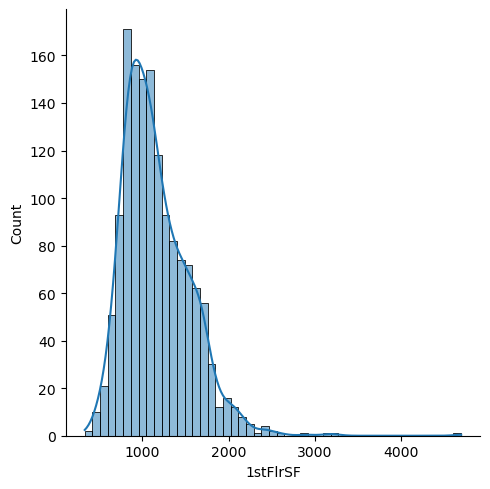

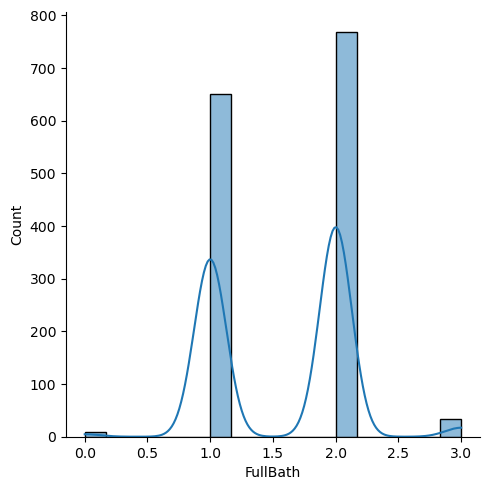

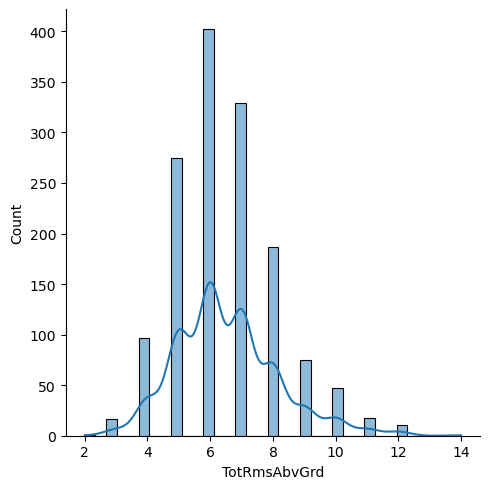

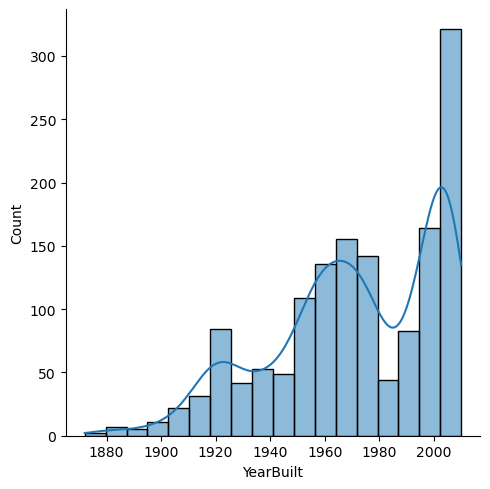

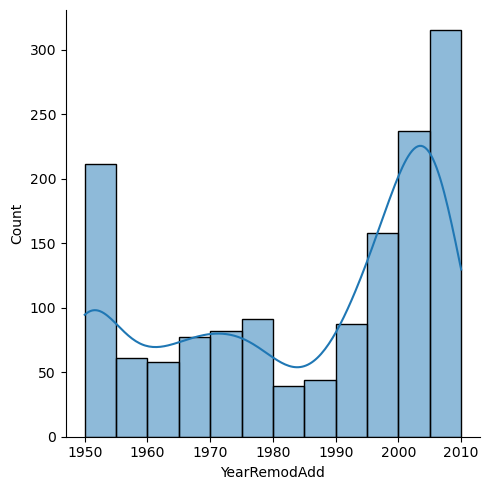

In [64]:
# density plots of Saleprice with top 10 correlated variables in loop - for assumption of normal distribution
for i in range(1, 11):
    sns.displot(df3[sorted.index[i]], kde=True)
    plt.show()

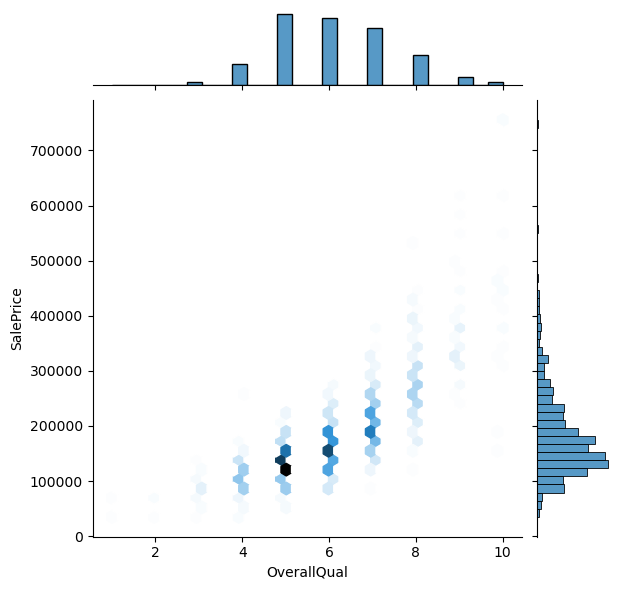

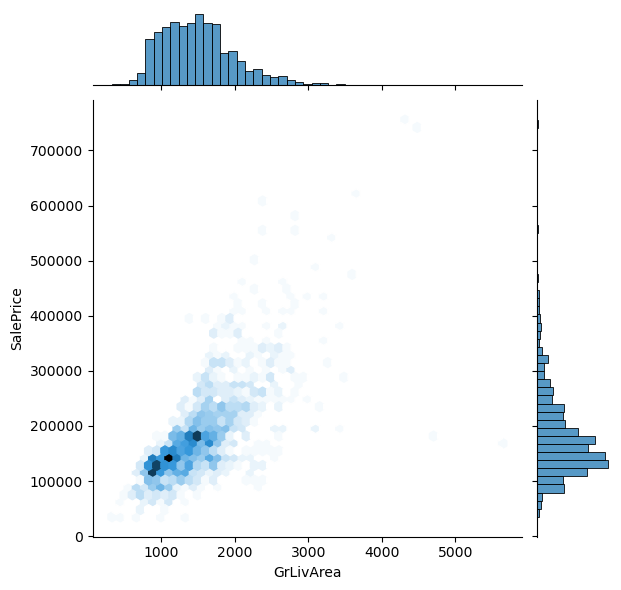

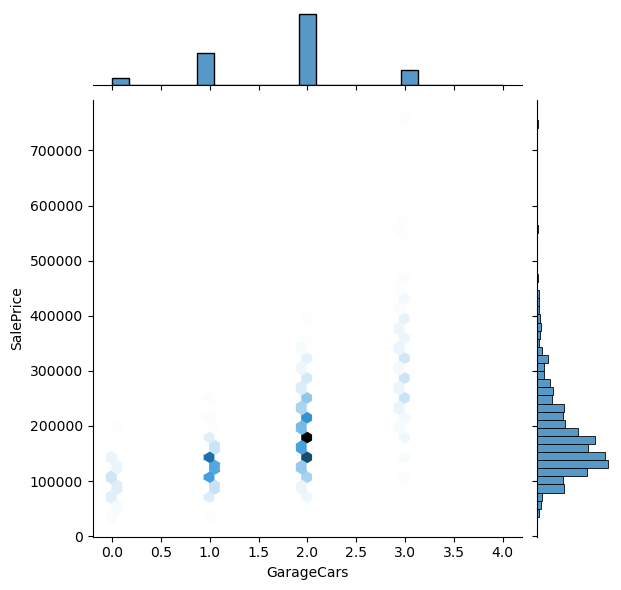

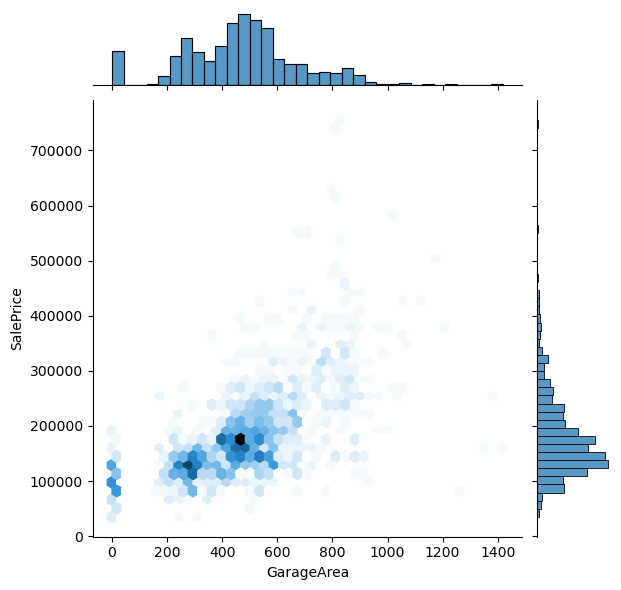

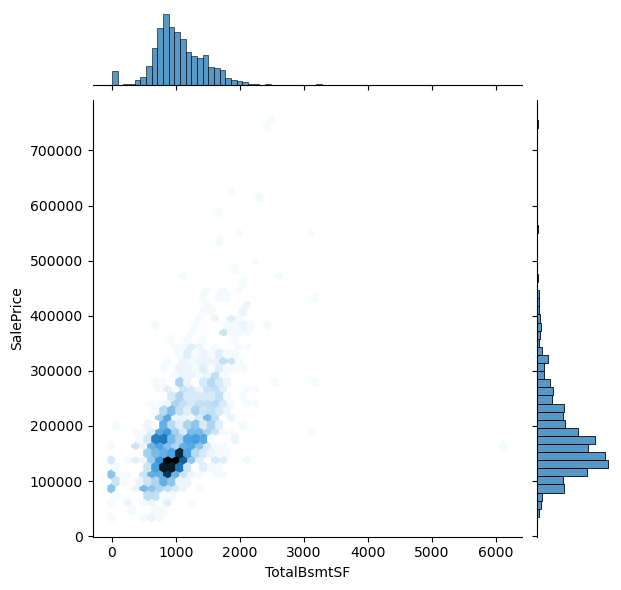

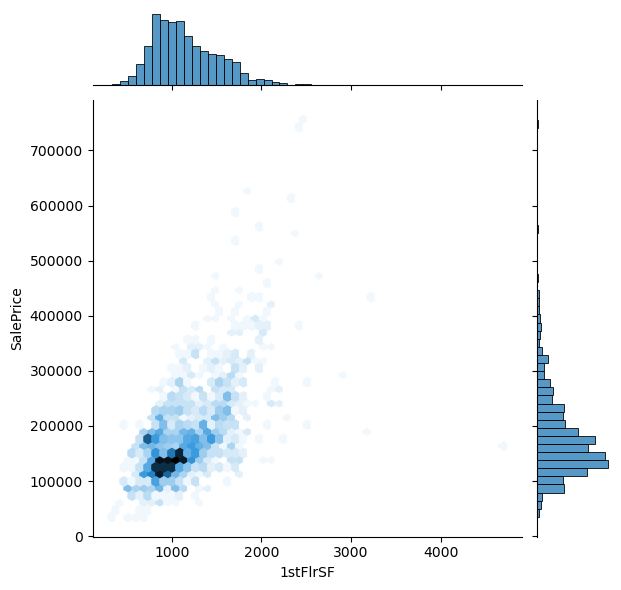

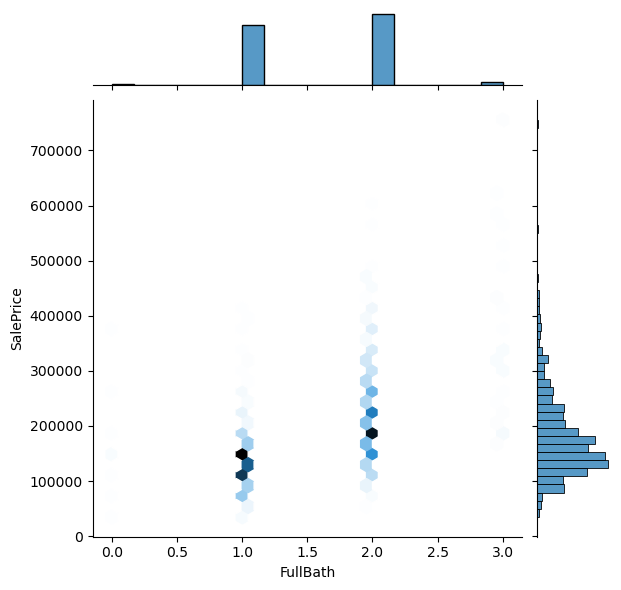

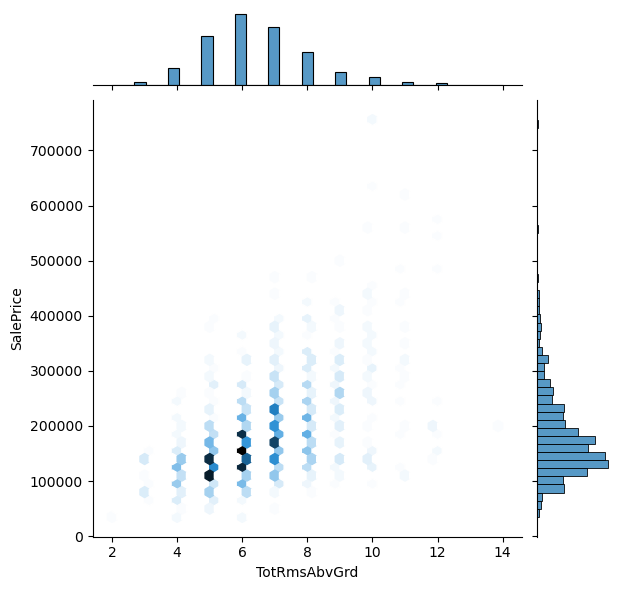

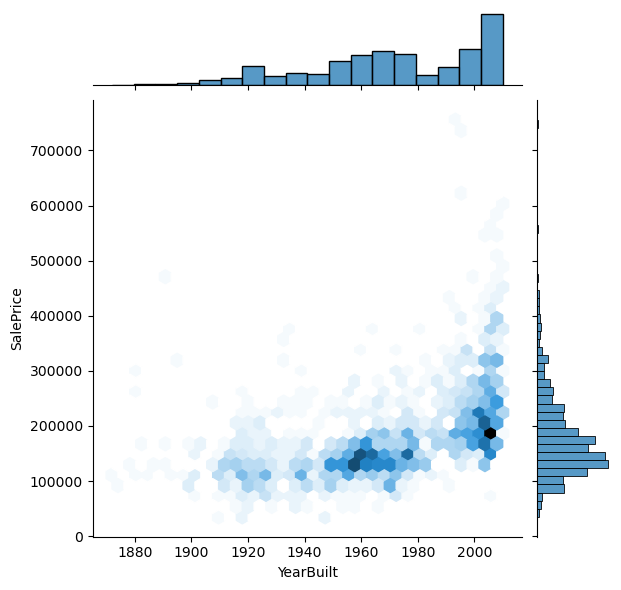

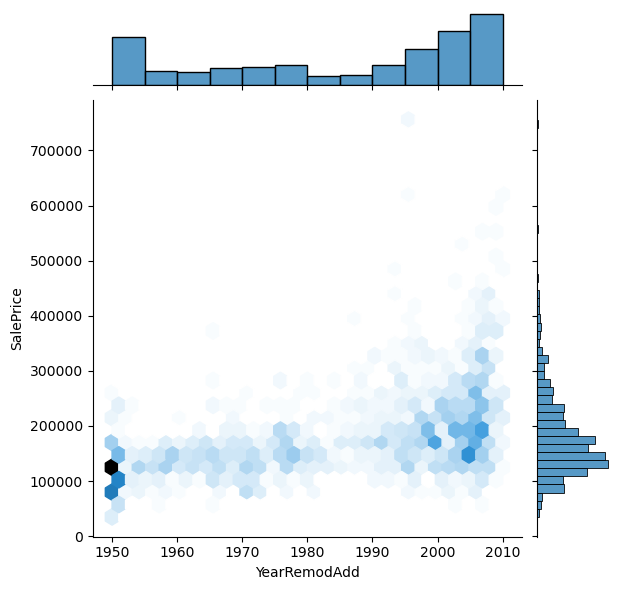

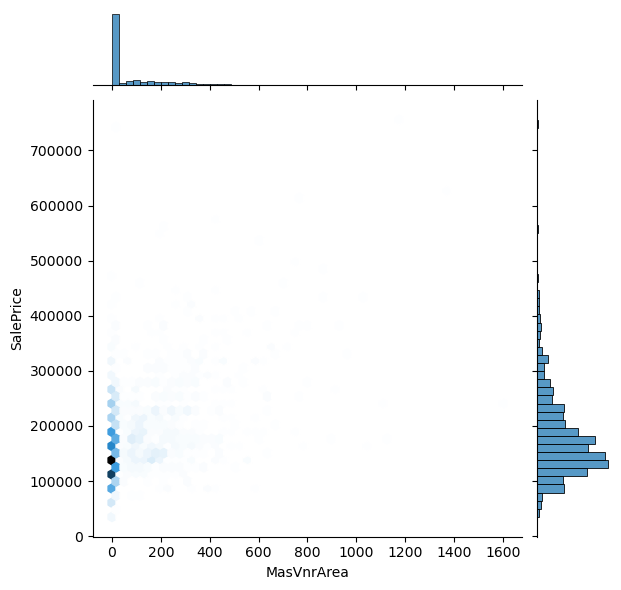

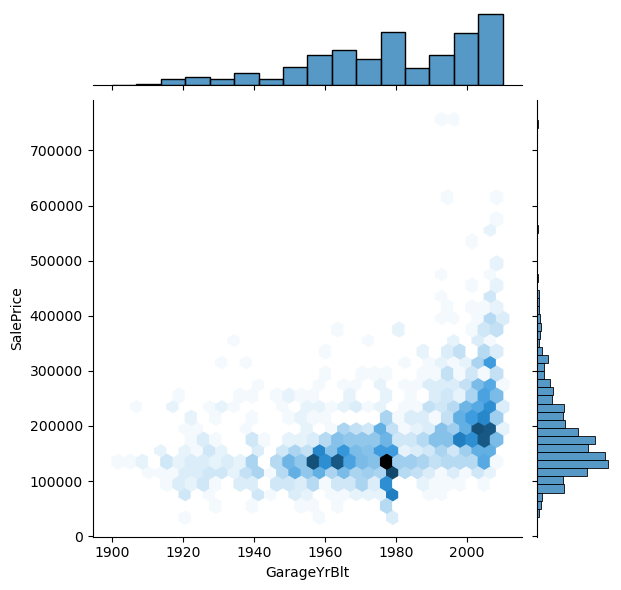

In [68]:
# plot sns jointplots with Saleprice with top 12 correlated variables 
for i in range(1, 13):
    sns.jointplot(x=df3[sorted.index[i]], y=df3['SalePrice'], data=df3, kind='hex')
    plt.show()







In [ ]:
nominal_categories = ['MSSubClass', 'MZoning', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'PavedDr', 'MiscFeature', 'SaleType', 'SaleCondition']


IndexError: index 53 is out of bounds for axis 0 with size 45

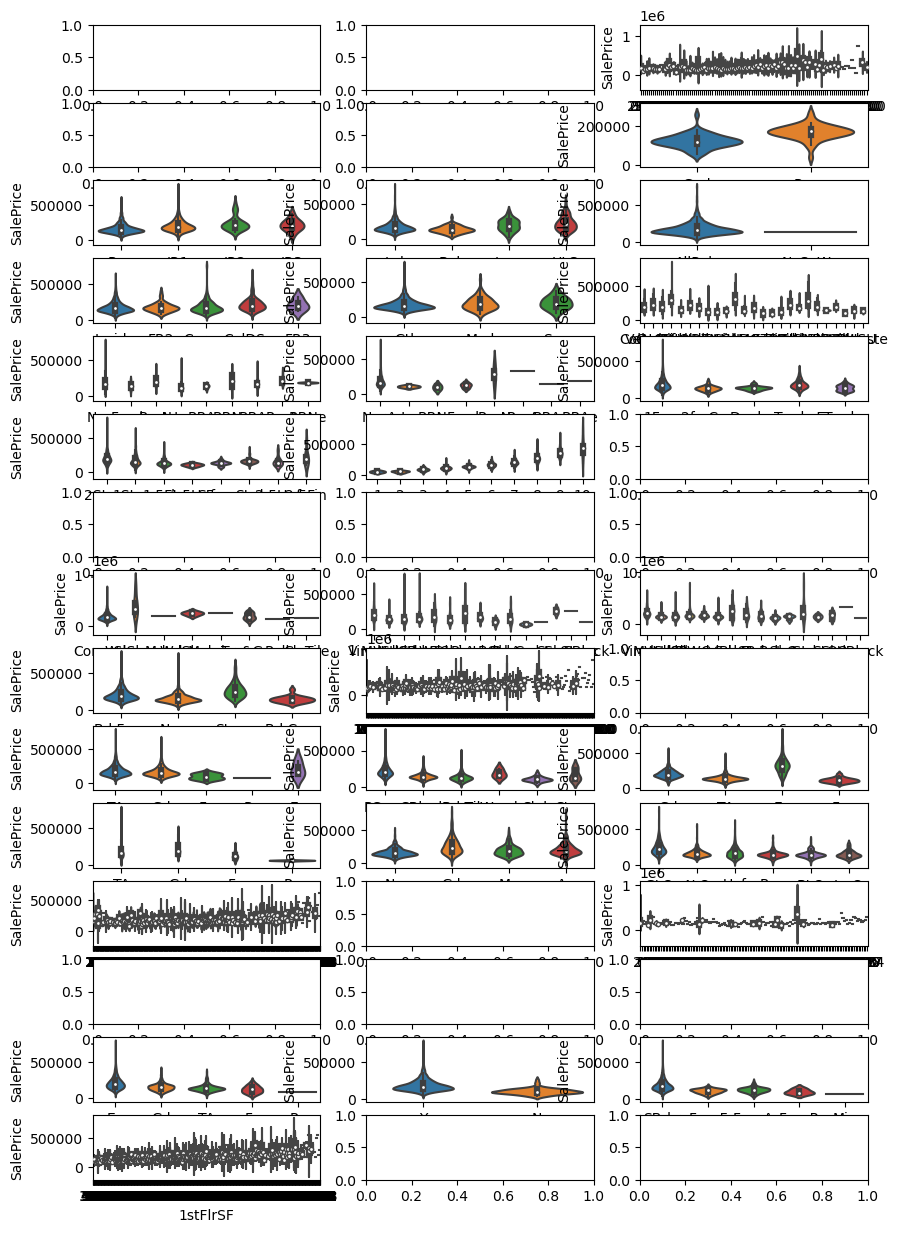

In [54]:
# Violin plots for categorical variables
fig, axes = plt.subplots(15,3, figsize=(10, 15))
axes = axes.flatten()
for i in range(len(df1.columns)):
    if df1[df1.columns[i]].dtype == 'object' and df1.columns[i]!= 'SalePrice':
        sns.violinplot(x=df1.columns[i+1], y='SalePrice', data=df1, ax=axes[i])
        axes[i].set_xlabel(df1.columns[i+1])
        axes[i].set_ylabel('SalePrice')

In [51]:
df1['SalePrice'].dtype

dtype('int64')